# Ejercicio 1

En este ejercicio definiremos una función que nos permita hacer un pixelado a una imagen.

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

imagen = cv.imread('imgpack/Monobanda/2_Corsica.jpg',cv.IMREAD_GRAYSCALE)

In [2]:
def diezmado(img, R):
    
    nds = list()
    i = 0
    
    # El diezmado se basa en la eliminación de pixeles en una imagen, y rehacer una matriz con los 
    # pixeles seleccionados, para ello la mejor forma sería recorrer la lista saltando aquellos 
    # pixeles que no usemos para la imagen diezmada.
    while i < img.shape[0]:
        j = 0
        while j < img.shape[1]:
            nds.append(img[i,j])
            j += int(1/R)
        i += int(1/R)
    
    # Una vez seleccionados esos pixeles, los transformaremos en un formato compatible con imagenes.
    resimg = np.reshape(nds,[int(np.ceil(img.shape[0]/(np.round(1/R)))),
                                 int(np.ceil(img.shape[1]/(np.round(1/R))))])

    return resimg

In [3]:
ejemplo = np.array([
    [0,1,3,2,4,3],
    [2,4,2,1,2,2],
    [7,8,5,6,4,3],
    [4,9,8,5,5,5],
    [4,8,7,5,4,5],
    [4,6,7,5,4,6]
])
print(ejemplo)

[[0 1 3 2 4 3]
 [2 4 2 1 2 2]
 [7 8 5 6 4 3]
 [4 9 8 5 5 5]
 [4 8 7 5 4 5]
 [4 6 7 5 4 6]]


In [4]:
print(diezmado(ejemplo,0.5))

[[0 3 4]
 [7 5 4]
 [4 7 4]]


In [5]:
img = np.array([
    [0,1,3,2,4,3,1,4,10,7,13,10],
    [2,4,2,1,2,2,7,13,7,4,7,7],
    [7,8,5,6,4,3,22,25,16,19,13,10],
    [4,9,8,5,5,5,13,28,25,16,16,16],
    [4,8,7,5,4,5,13,25,22,16,13,16],
    [4,6,7,5,4,6,13,19,22,16,13,19],
    [0,1,3,2,4,3,1,4,10,7,13,10],
    [2,4,2,1,2,2,7,13,7,4,7,7],
    [7,8,5,6,4,3,22,25,16,19,13,10],
    [4,9,8,5,5,5,13,28,25,16,13,16],
    [4,8,7,5,4,5,13,25,22,16,13,16],
    [4,6,7,5,4,6,13,19,22,16,13,19]
])
print("Matriz img")
print(img)
res1 = diezmado(img, 0.5)
res2 = diezmado(img, 0.33)
res3 = diezmado(img, 0.25)
print("Matriz res1")
print(res1, res1.shape)
print("Matriz res2")
print(res2, res2.shape)
print("Matriz res3")
print(res3, res3.shape)

Matriz img
[[ 0  1  3  2  4  3  1  4 10  7 13 10]
 [ 2  4  2  1  2  2  7 13  7  4  7  7]
 [ 7  8  5  6  4  3 22 25 16 19 13 10]
 [ 4  9  8  5  5  5 13 28 25 16 16 16]
 [ 4  8  7  5  4  5 13 25 22 16 13 16]
 [ 4  6  7  5  4  6 13 19 22 16 13 19]
 [ 0  1  3  2  4  3  1  4 10  7 13 10]
 [ 2  4  2  1  2  2  7 13  7  4  7  7]
 [ 7  8  5  6  4  3 22 25 16 19 13 10]
 [ 4  9  8  5  5  5 13 28 25 16 13 16]
 [ 4  8  7  5  4  5 13 25 22 16 13 16]
 [ 4  6  7  5  4  6 13 19 22 16 13 19]]
Matriz res1
[[ 0  3  4  1 10 13]
 [ 7  5  4 22 16 13]
 [ 4  7  4 13 22 13]
 [ 0  3  4  1 10 13]
 [ 7  5  4 22 16 13]
 [ 4  7  4 13 22 13]] (6, 6)
Matriz res2
[[ 0  2  1  7]
 [ 4  5 13 16]
 [ 0  2  1  7]
 [ 4  5 13 16]] (4, 4)
Matriz res3
[[ 0  4 10]
 [ 4  4 22]
 [ 7  4 16]] (3, 3)


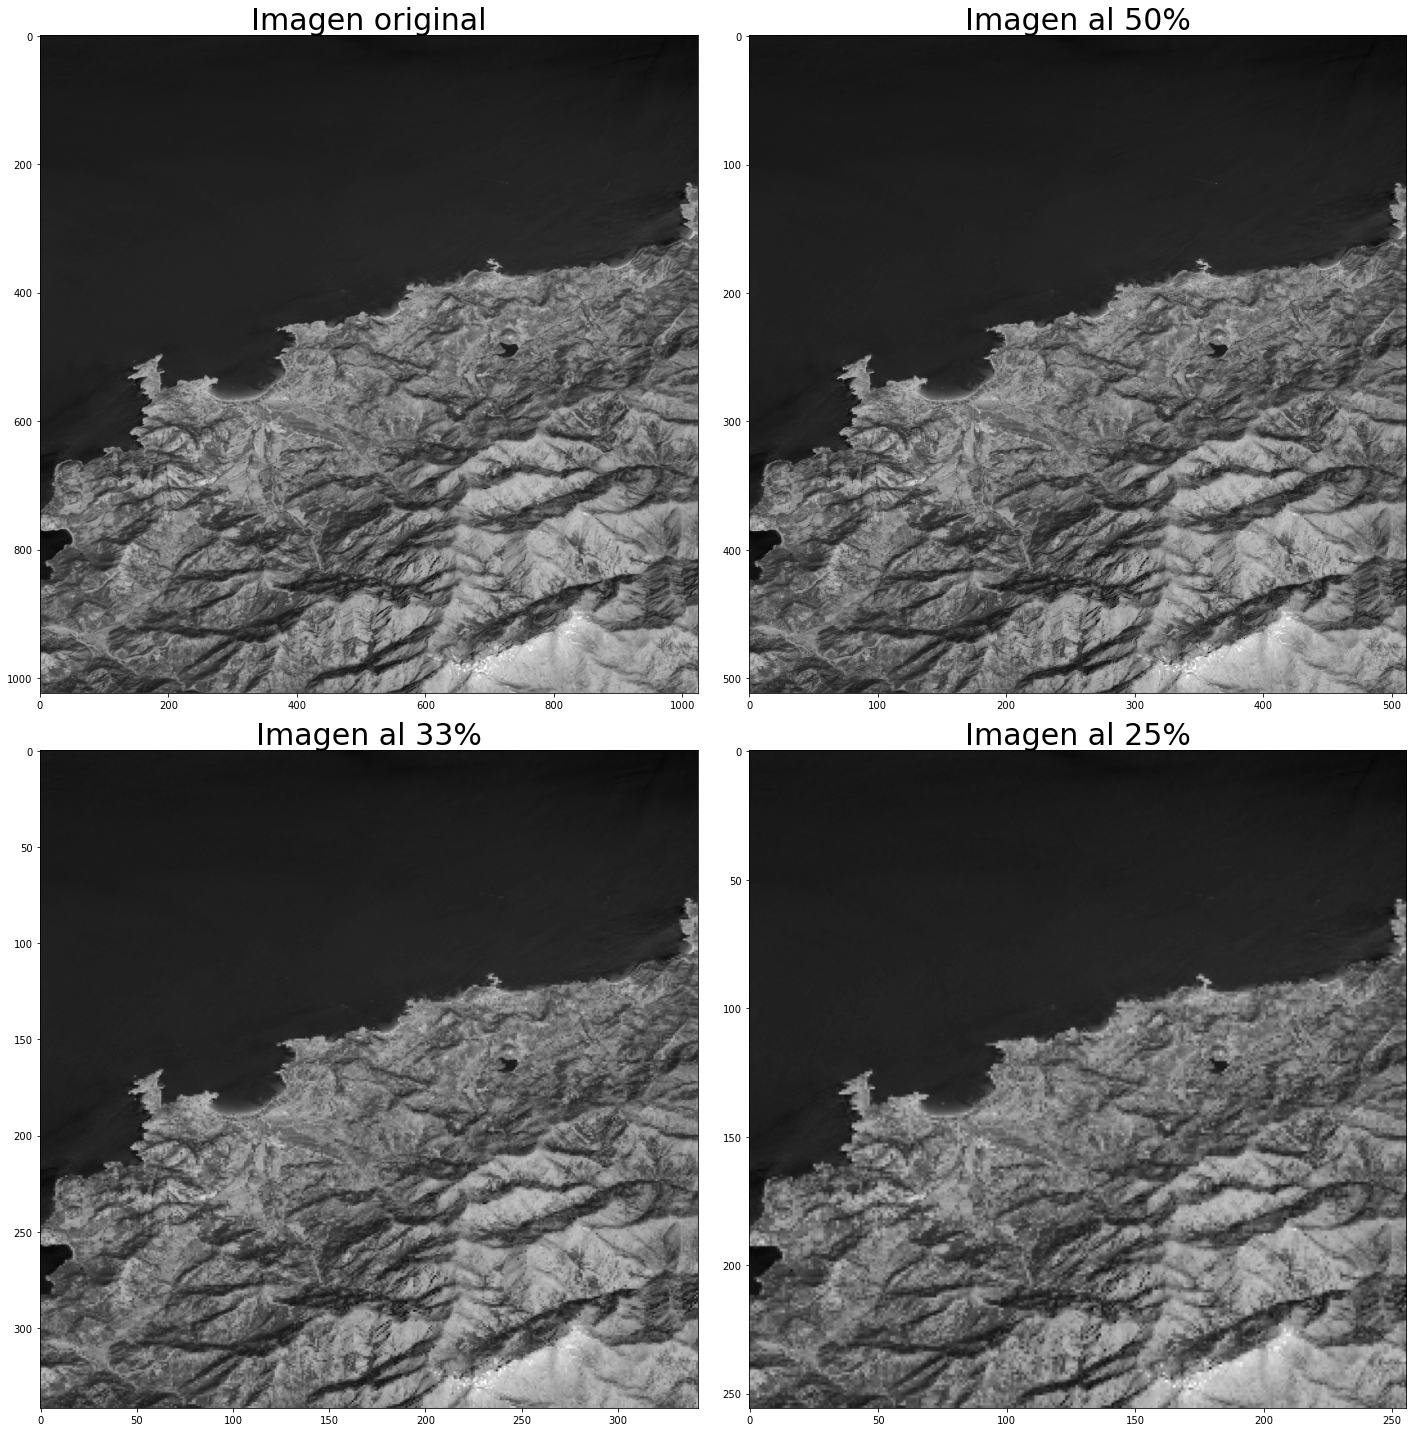

In [6]:
R05 = diezmado(imagen,0.5)
R033 = diezmado(imagen,0.33)
R025 = diezmado(imagen,0.25)
plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title("Imagen original", fontsize = 30)

plt.subplot(2, 2, 2)
plt.imshow(R05, cmap='gray')
plt.title("Imagen al 50%", fontsize = 30)

plt.subplot(2, 2, 3)
plt.imshow(R033, cmap='gray')
plt.title("Imagen al 33%", fontsize = 30)

plt.subplot(2, 2, 4)
plt.imshow(R025, cmap='gray')
plt.title("Imagen al 25%", fontsize = 30)

plt.tight_layout()
plt.show()

### Como podemos ver, no se aprecia cambio alguno en las imagenes por la mala definición que otorga jupyter notebook, asi que la guardaremos en imagenes externas para poder apreciarlas con mejor definición

In [7]:
cv.imwrite("soluciones/ej1-50%.png",R05)
cv.imwrite("soluciones/ej1-33%.png",R033)
cv.imwrite("soluciones/ej1-25%.png",R025)

True